In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
dataset.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [142]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:
df = pd.get_dummies(dataset,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [144]:
dataset['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [145]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [146]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [147]:
x = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)


In [149]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [150]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [153]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7725 - loss: 0.5217 - val_accuracy: 0.7975 - val_loss: 0.4637
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7981 - loss: 0.4510 - val_accuracy: 0.8056 - val_loss: 0.4356
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.4304 - val_accuracy: 0.8112 - val_loss: 0.4226
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8166 - loss: 0.4195 - val_accuracy: 0.8188 - val_loss: 0.4149
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4103 - val_accuracy: 0.8231 - val_loss: 0.4071
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.4015 - val_accuracy: 0.8263 - val_loss: 0.4003
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8333 - loss: 0.3937 - val_accuracy: 0.8325 - val_loss: 0.3897
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.3852 - val_accu

In [154]:
model.layers[1].get_weights()

[array([[ 0.58088946,  0.37378588, -0.32038444,  0.08594093,  0.16843818,
          0.5570533 , -0.48793012,  0.2668957 ,  0.39467067, -0.35868087,
         -0.00576037],
        [ 0.59745353, -0.653677  ,  0.65274066, -0.28213066, -0.11257328,
         -0.25238064, -0.095137  ,  0.19579542,  0.31218746,  0.37615308,
          0.35089427],
        [-0.41227883,  0.42066866, -0.09716009,  0.50096864, -0.7380196 ,
         -1.9172181 ,  0.05019481, -0.39417693, -1.3293041 ,  1.038617  ,
         -1.4237353 ],
        [ 0.5393875 ,  0.19642702, -0.41741326, -0.7281312 ,  0.22266902,
          0.11243759,  0.44663918,  0.24589658,  0.49601975,  0.36458683,
          0.17026214],
        [ 0.4245983 ,  0.19587475, -0.23472722,  0.16003151,  0.33688983,
          0.04078672,  0.05810725, -0.4159003 , -0.42016742, -0.2514504 ,
         -0.6240353 ],
        [ 0.25903463, -0.26426157,  0.2841717 ,  0.30311257,  0.0139533 ,
         -0.09953082,  0.8136134 ,  0.5838451 ,  0.18600255, -1.0639882

In [155]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


In [156]:
y_pred = np.where(y_log>0.5,1,0)

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.869

In [158]:
# 0.813 0.853 0.868 0.859 0.862 0.8605

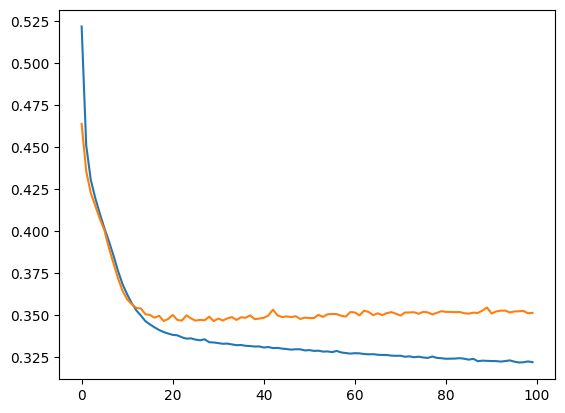

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

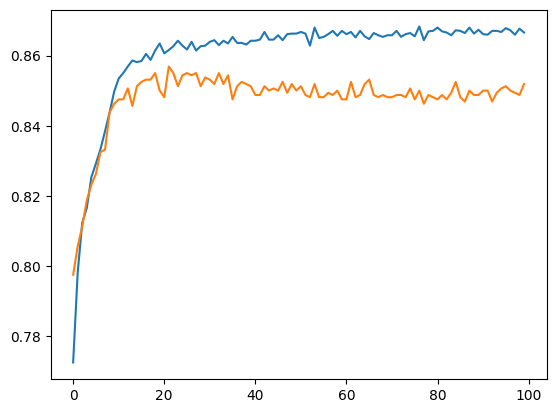

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])